In [112]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [113]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [114]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [115]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [116]:
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)


In [117]:
# Print all of the classes mapped to the Base
print(Base.classes.keys())

['measurement', 'station']


In [118]:
# Assign the measurement class to a variable called `Measurement` and
# the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station

In [119]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [120]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).first()[0]
most_recent_date = dt.datetime.strptime(most_recent_date, "%Y-%m-%d").date()
most_recent_date

datetime.date(2017, 8, 23)

Text(41.20833333333333, 0.5, 'Inches')


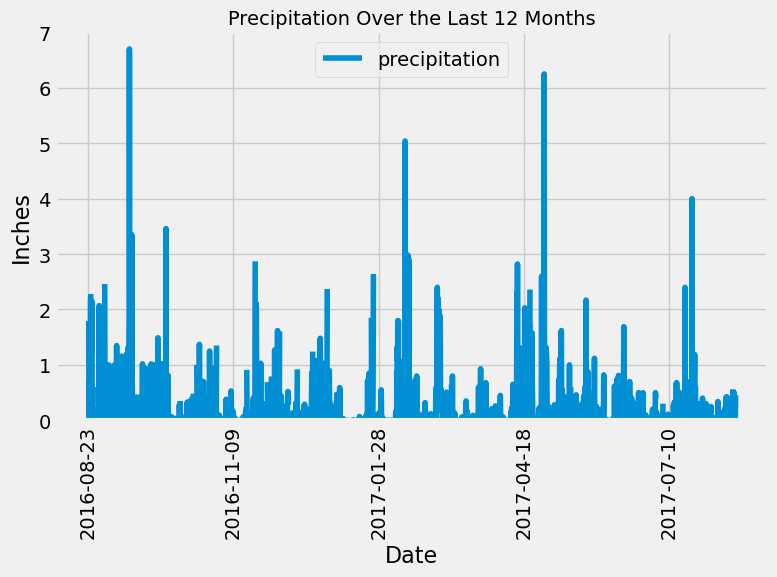

In [143]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.
# Calculate the date one year from the last date in data set.

one_year_ago = most_recent_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation_data, columns=['date', 'precipitation'])

# Sort the dataframe by date
precipitation_df_sorted = precipitation_df.sort_values(by='date')

# Ensure the DataFrame has the correct structure with 'date' as the index
precipitation_df_sorted.set_index('date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
# Plot the data with the appropriate figsize and labels
ax = precipitation_df_sorted.plot(y='precipitation', figsize=(8, 6), legend=False)

# Add axis labels as in your example
plt.title('Precipitation Over the Last 12 Months', fontsize=14)
plt.xlabel('Date', fontsize=16)
y_label = plt.ylabel('Inches', fontsize=16)

# Customize the y-axis limit to match the example (if needed)
plt.ylim(0, 7)

# Customize the legend position (placing it inside the plot)
ax.legend(['precipitation'], loc='upper center', bbox_to_anchor=(0.5, 1.00), ncol=1)

# Customize tick parameters to match the desired appearance
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)

# Adjust the layout to avoid clipping
plt.tight_layout()

# Print the Text object for the y-axis label
print(y_label)

# Show the plot
plt.show()


In [122]:
# Use Pandas to calculate the summary statistics for the precipitation data
# Display the summary statistics
precipitation_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [123]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).all()
print(total_stations)

[(9,)]


In [124]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

# Print the result with each tuple on a new line
for station in active_stations:
    print(f"{station},")


('USC00519281', 2772),
('USC00519397', 2724),
('USC00513117', 2709),
('USC00519523', 2669),
('USC00516128', 2612),
('USC00514830', 2202),
('USC00511918', 1979),
('USC00517948', 1372),
('USC00518838', 511),


In [125]:
# Find the most active station (from the previous query)
most_active_station = session.query(Measurement.station).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).first()[0]
print(f"Most active station: {most_active_station}")

Most active station: USC00519281


In [126]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temperature_stats = session.query(
    func.min(Measurement.tobs),
    func.max(Measurement.tobs),
    func.avg(Measurement.tobs)
).filter(Measurement.station == most_active_station).all()
temperature_stats

[(54.0, 85.0, 71.66378066378067)]

Text(0, 0.5, 'Frequency')


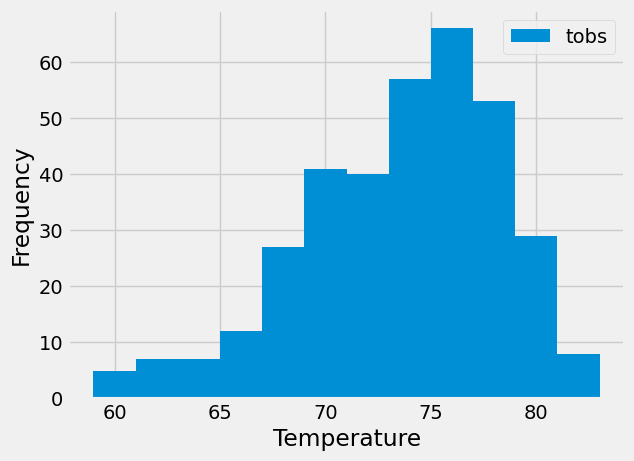

In [127]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_data = session.query(Measurement.tobs).\
    filter(Measurement.station == most_active_station).\
    filter(Measurement.date >= one_year_ago).all()

# Convert the query result to a list of temperatures
temperatures = [temp[0] for temp in tobs_data]

# Plot the results as a histogram with 12 bins
plt.hist(temperatures, bins=12, label='tobs')

# Add labels and legend
plt.xlabel('Temperature')
y_label = plt.ylabel('Frequency')
plt.legend(loc='upper right')

# Print the Text object for the y-axis label (similar to how it works with precipitation plot)
print(y_label)

# Show the plot
plt.show()

# Close Session

In [128]:
# Close Session
session.close()
